<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/HW1_KEY_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTRUCTIONS

Save a copy of this notebook in your Google drive.  Complete the HW and submit a **viewable** link (make sure to change share permissions from "**Restricted**" to "**Anyone with link can view**".

***Bold and italicize the font of your responses.***

In [ ]:
#Loading packages required for this HW
install.packages('sandwich')
library(sandwich)
install.packages('lmtest')
library(lmtest)
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



# Question 1 (30 points)

For this question we will analyze FEV data set, measuring forced expiratory volume (FEV; in liters/second) and its relationship with smoking status, but adjusted for age, among 654 children and teens.

In [ ]:
fev <- read.csv('https://www.dropbox.com/s/2n8xb1d24s4kneo/FEV.csv?dl=1')

In [ ]:
head(fev)

,SUBJID,AGE,FEV,HEIGHT,SEX,SMOKE
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,301,9,1.708,57.0,F,No
2,451,8,1.724,67.5,F,No
3,501,7,1.720,54.5,F,No
4,642,9,1.558,53.0,M,No
5,901,9,1.895,57.0,M,No
6,1701,8,2.336,61.0,F,No


## A)

Consider the plot below:

`geom_smooth()` using formula = 'y ~ x'


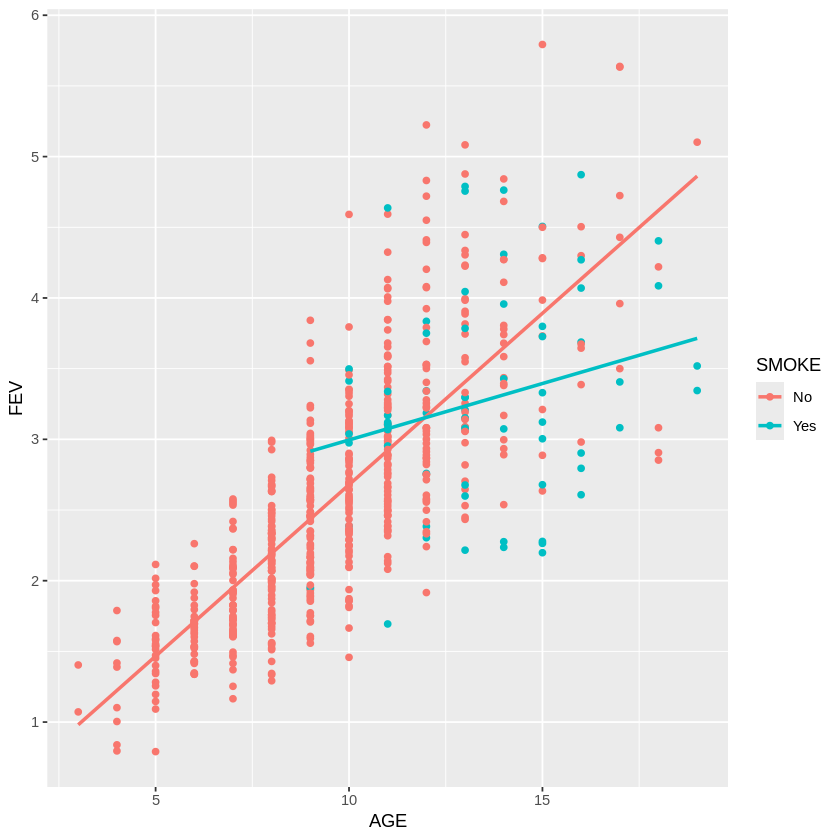

In [ ]:
library(ggplot2)
ggplot(data = fev, aes(x = AGE, y = FEV,col=SMOKE)) +
geom_point() + geom_smooth(method='lm', se = FALSE)

Specify the equation of the multiple linear regression model that is shown in this plot, including definitions of all terms you include in the model.

**In the model above, completely separate straight-line relationships between FEV and age are modeled for smokers and non-smokers.  Thus there is a linear (no polynomial) relationship with age modeled, and that relationship has an interaction with smoking status. The MLR model would be:**

$$E(FEV) = \beta_0 + \beta_1X + \beta_2 U + \beta_3 X\cdot U,$$

**where:**

* $X = Age$
* $U = \begin{cases}1 & Smoke = Yes \\0 & Smoke = No \end{cases}$

## B)

Fit the model you specified above, and assess its residual structure. Does the model fit well, and is constant variance assumption appear satisfied?  Explain.

In [ ]:
fevfit <- lm(FEV~SMOKE*AGE, data = fev)
summary(fevfit)


Call:
lm(formula = FEV ~ SMOKE * AGE, data = fev)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76645 -0.34947 -0.03364  0.33679  2.05990 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253396   0.082651   3.066  0.00226 ** 
SMOKEYes      1.943571   0.414285   4.691 3.31e-06 ***
AGE           0.242558   0.008332  29.113  < 2e-16 ***
SMOKEYes:AGE -0.162703   0.030738  -5.293 1.65e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5537 on 650 degrees of freedom
Multiple R-squared:  0.5941,	Adjusted R-squared:  0.5922 
F-statistic: 317.1 on 3 and 650 DF,  p-value: < 2.2e-16


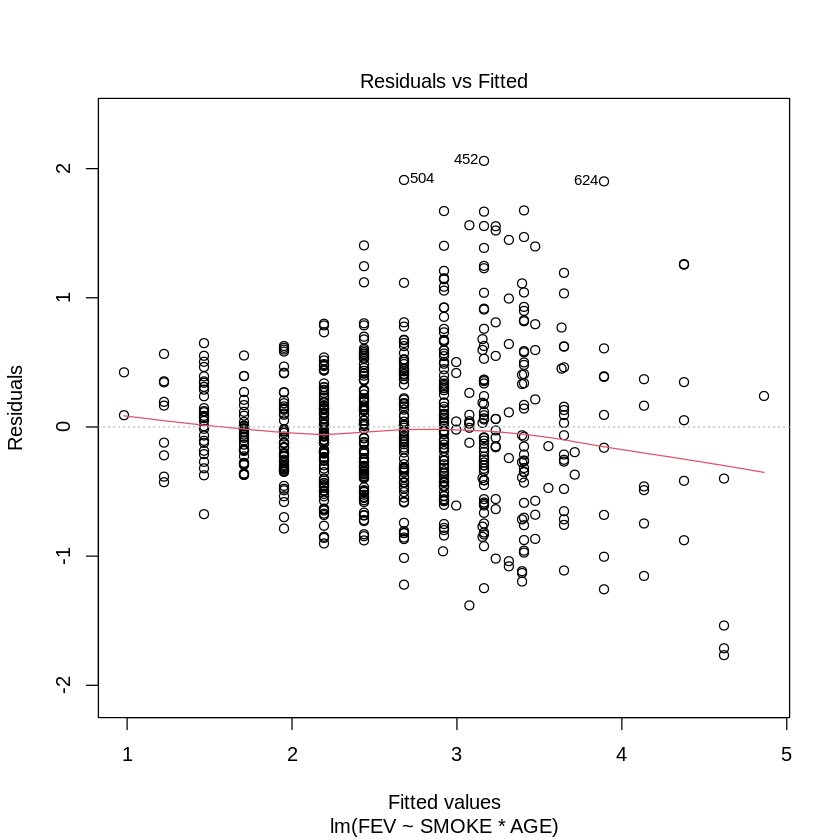

In [ ]:
plot(fevfit, 1)

***The residual plot shows violations of constant variance: the residuals are much more variable for large fitted values than for small fitted values.***

***This is again illustrated in the scale-location plot below, which shows a clearly increasing relationship of residual size with fitted value:***

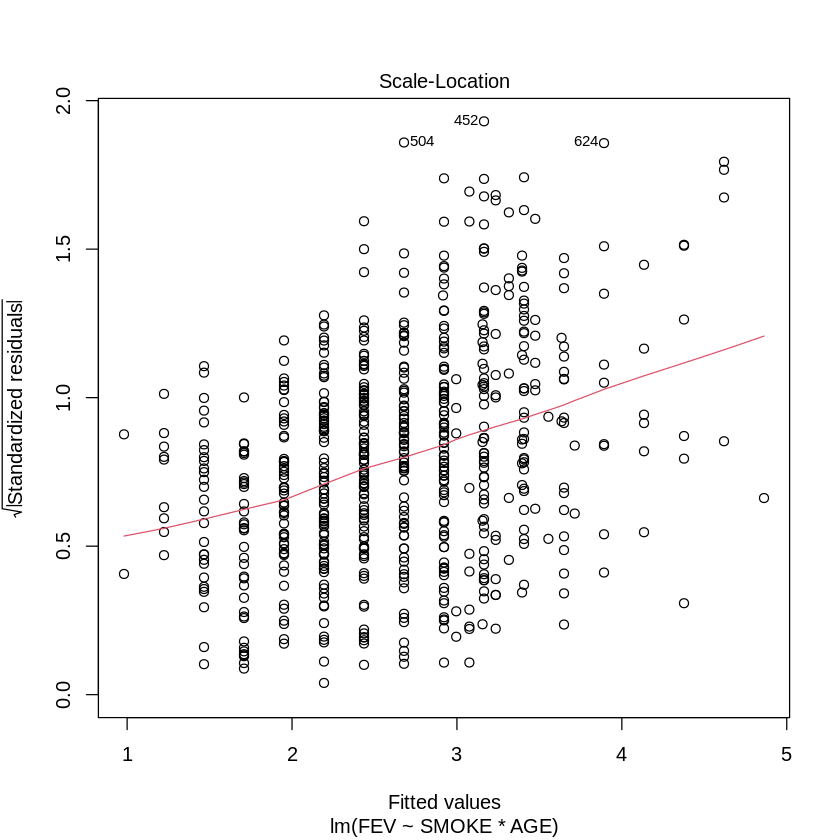

In [ ]:
plot(fevfit, which = 3)

## C)

Is there evidence that the relationship of FEV with smoking status depends on age?  Explain, using an appropriate p-value and 95% confidence interval in your justification.  Your p-value and 95% confidence interval should be based on whichever standard error estimate you deem most appropriate.

***Note that since we identified constant variance was violated we should use robust standard errors for all inference, including the p-value and 95% confidence interval.***

In [ ]:
coeftest(fevfit, vcov. = vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.253396   0.086601  2.9260  0.003553 ** 
SMOKEYes      1.943571   0.477703  4.0686 5.312e-05 ***
AGE           0.242558   0.010029 24.1862 < 2.2e-16 ***
SMOKEYes:AGE -0.162703   0.035781 -4.5472 6.484e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
confint(coeftest(fevfit, vcov. = vcovHC))

,2.5 %,97.5 %
(Intercept),0.08334493,0.42344612
SMOKEYes,1.00554358,2.88159789
AGE,0.22286569,0.26225113
SMOKEYes:AGE,-0.23296217,-0.09244318


***The interaction term tests whether the relationship of FEV with age differs by smoking status (i.e., whether the two lines in the scatterplot above are parallel).  There is strong evidence that this is the case; the interaction term p-value is < .001 and the 95% CI for this term of (-0.23, -0.09) does not overlap 0.  Considered the other way, there is strong evidence that the FEV difference across smoking status depends on the age of the smokers/nonsmokers considered***

## D)
Fully characterize the difference in FEV between 11-year-old smokers and 11-year-old nonsmokers.  This means find and interpret a contrast, and determine whether the contrast is significant based on an appropriate p-value and 95% CI. Use whichever standard error estimate you deem most appropriate in your contrast inference.

In [ ]:
(emmeans10 <- emmeans(fevfit, ~SMOKE, at = list(AGE =11), vcov. = vcovHC))

NOTE: Results may be misleading due to involvement in interactions



 SMOKE emmean    SE  df lower.CL upper.CL
 No      2.92 0.032 650     2.86     2.98
 Yes     3.08 0.124 650     2.83     3.32

Confidence level used: 0.95 

In [ ]:
contrast(emmeans10, 'pairwise')
confint(contrast(emmeans10, 'pairwise'))

 contrast estimate    SE  df t.ratio p.value
 No - Yes   -0.154 0.128 650  -1.204  0.2290


,contrast,estimate,SE,df,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No - Yes,-0.1538413,0.1277693,650,-0.4047317,0.09704905


**Among 11 year olds the average FEV is 0.15L/s higher for smokers than nonsmokers, but this is not a significant difference (p-value = 0.23; 95% CI: -0.4, 0.1)**

## E)

Fully characterize the difference in FEV between 18-year-old smokers and 18-year-old nonsmokers.   This means find and interpret a contrast, and determine whether the contrast is significant based on an appropriate p-value and 95% CI. Use whichever standard error estimate you deem most appropriate in your contrast inference.

In [ ]:
(emmeans18 <- emmeans(fevfit, ~SMOKE, at = list(AGE =18), vcov. = vcovHC))

NOTE: Results may be misleading due to involvement in interactions



 SMOKE emmean     SE  df lower.CL upper.CL
 No      4.62 0.0979 650     4.43     4.81
 Yes     3.63 0.1820 650     3.28     3.99

Confidence level used: 0.95 

In [ ]:
contrast(emmeans18, 'pairwise')
confint(contrast(emmeans18, 'pairwise'))

 contrast estimate    SE  df t.ratio p.value
 No - Yes    0.985 0.207 650   4.761  <.0001


,contrast,estimate,SE,df,lower.CL,upper.CL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No - Yes,0.9850774,0.2068985,650,0.5788073,1.391348


**Among 18 year olds the average FEV is 0.99 L/s higher for nonsmokers than smokers, which is a significant difference (p-value = <.0001; 95% CI: 0.6, 1.4)**

# Question 2 (40 points)

The data for this task come from J. Park and S. Cho (2010): "Investigating the Effect of Task Complexities on the Response Time of Human Operators to Perform
Emergency Tasks of Nuclear Power Plants," Annals of Nuclear Energy,
Vol. 37, pp. 1160-1171.

The response variable is the time (in seconds) it took for nuclear power plant workers (NPPWs) to complete 35 emergency tacks of varying complexity, where the complexity is measured measured by TACOM score; higher score indicates higher task complexity.  The nationality of the worker (U.S. or non-U.S.) was also recorded.  The power plants were located in South Korea:


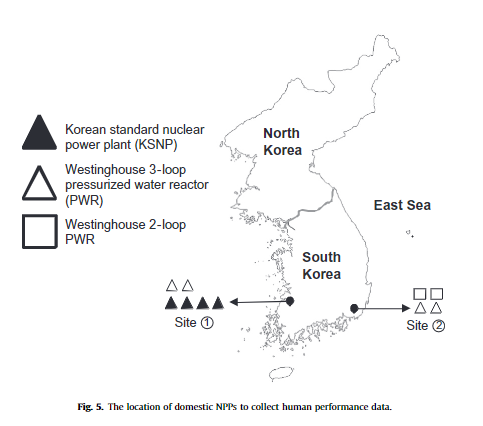

In [ ]:
npp <- read.csv('https://www.dropbox.com/s/id0iv5cxyns9fxt/nuclear_power_plant.csv?dl=1')
head(npp)

,TaskNumber,Nationality,Time,TACOM
,<int>,<chr>,<int>,<dbl>
1,1,US,60,3.788
2,2,US,336,6.108
3,3,US,432,6.283
4,4,US,516,6.373
5,5,US,624,6.459
6,6,US,708,6.572


## A)

Create a scatterplot of the time/TACOM relationship, with points color-coded by NPPW nationality.  Summarize the plot.

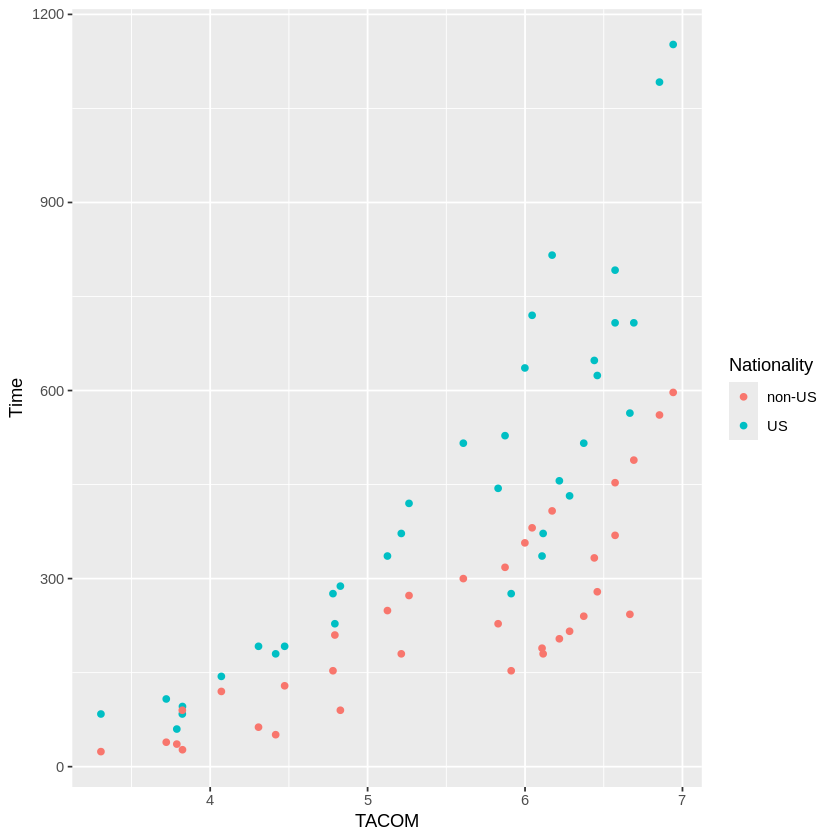

In [ ]:
library(ggplot2)
ggplot(data = npp) + geom_point(aes(x = TACOM, y = Time, col=Nationality))

***As task complexity increases, so does the time to complete the task, and this relationship appears slightly nonlinear.  Regardless of task complexity, non-US workers appear to be slower than US workers.***

## B)

Consider the following model:


$$\mbox{Model 1: }E(Time) = \beta_0 + \beta_1 X + \beta_2U + \beta_3 XU$$

where

* $X = TACOM$
* $U = \begin{cases} 1 & Nationality = US \\ 0 & Nationality = \mbox{non-US}\end{cases}$

Fit this model and superimpose the fit on the scatterplot.  Then assess the residuals and comment on the quality of the fit.

In [ ]:
mod1 <- lm(Time~TACOM*Nationality, data = npp)
summary(mod1)


Call:
lm(formula = Time ~ TACOM * Nationality, data = npp)

Residuals:
    Min      1Q  Median      3Q     Max 
-263.36  -60.23   -1.63   52.83  380.90 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -406.09     104.65  -3.880 0.000243 ***
TACOM                 117.23      18.79   6.240 3.54e-08 ***
NationalityUS        -386.01     148.00  -2.608 0.011246 *  
TACOM:NationalityUS   107.98      26.57   4.064 0.000131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 117 on 66 degrees of freedom
Multiple R-squared:  0.7816,	Adjusted R-squared:  0.7717 
F-statistic: 78.74 on 3 and 66 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


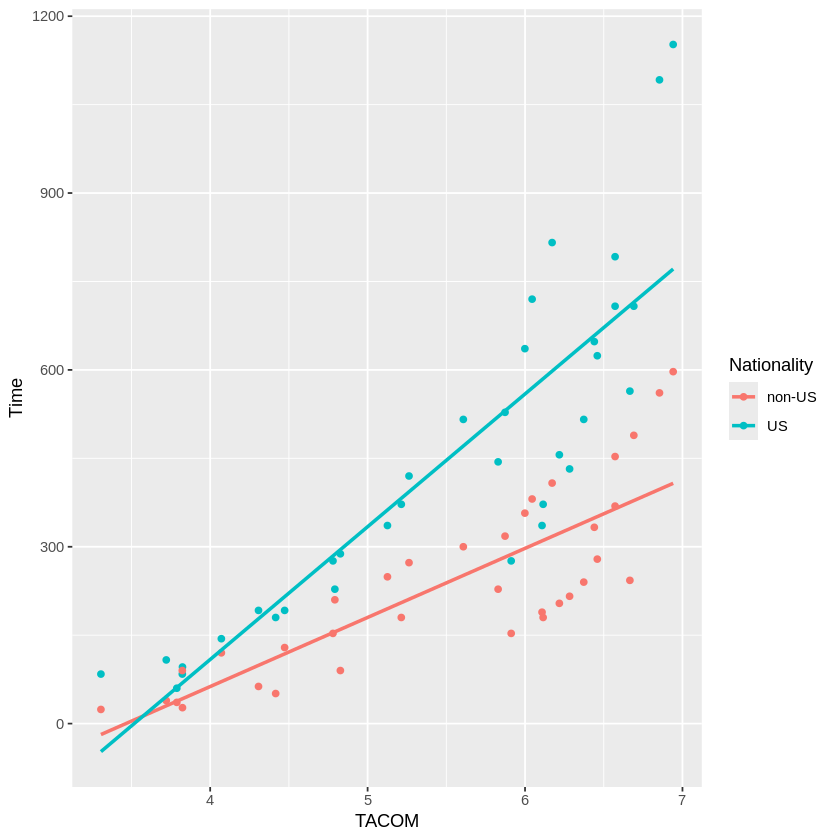

In [ ]:
ggplot(data = npp) + geom_point(aes(x = TACOM, y = Time, col=Nationality)) +
  geom_smooth(aes(x = TACOM, y = Time, col=Nationality), method='lm', se = FALSE)

***These straight-line fits do not appear to fully describe the nature of the complexity-time relationship.***

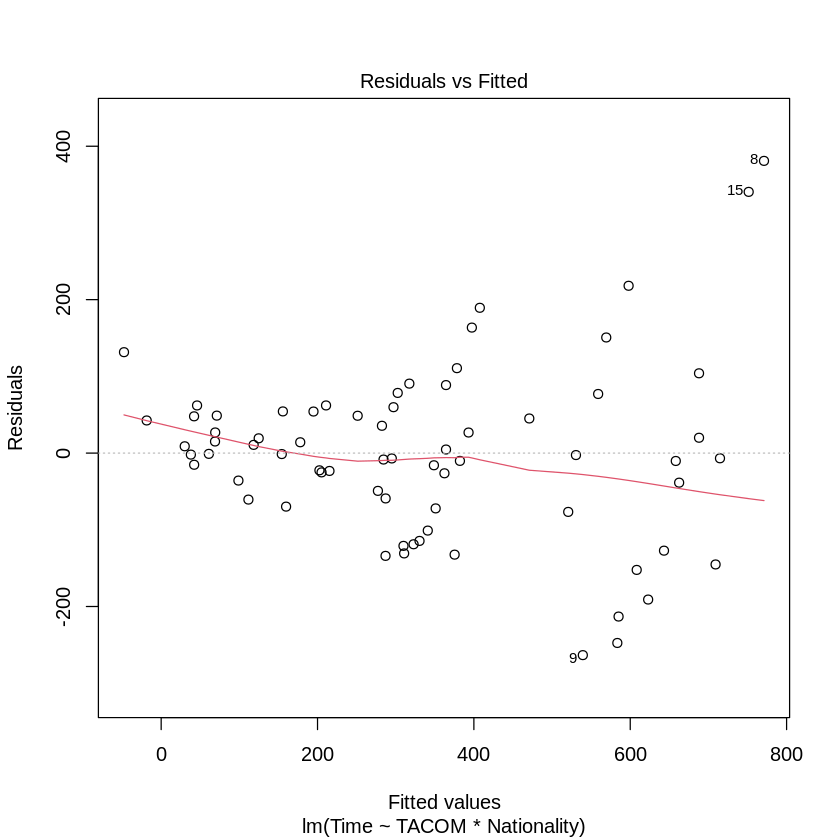

In [ ]:
plot(mod1, 1)

***The nonlinearity is demonstrated again in this residual plot, where the residual appear to have positive mean for low fitted values and negative mean for large fitted values.  In addition, the constant variance assumption appears clearly violated: the residual vaiability increases as the fitted values do.***

## C)

Consider a second model:
$$\mbox{Model 2: }E(Time) = \mbox{All model 1 terms} + \beta_4 X^2 + \beta_5 X^2 \cdot U$$

Fit this model an superimpose the fits on the scatterplot.  Also assess the residuals and comment on the quality of the fit, especially as it compares to the Model 1 fit.

In [ ]:
mod2 <- lm(Time~poly(TACOM,2)*Nationality, data = npp)
summary(mod2)


Call:
lm(formula = Time ~ poly(TACOM, 2) * Nationality, data = npp)

Residuals:
     Min       1Q   Median       3Q      Max 
-223.332  -54.050   -0.915   69.669  266.347 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     235.20      18.48  12.727  < 2e-16 ***
poly(TACOM, 2)1                1032.69     154.62   6.679 6.79e-09 ***
poly(TACOM, 2)2                 199.43     154.62   1.290    0.202    
NationalityUS                   204.69      26.14   7.831 6.39e-11 ***
poly(TACOM, 2)1:NationalityUS   951.22     218.67   4.350 4.99e-05 ***
poly(TACOM, 2)2:NationalityUS   287.92     218.67   1.317    0.193    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 109.3 on 64 degrees of freedom
Multiple R-squared:  0.8151,	Adjusted R-squared:  0.8007 
F-statistic: 56.43 on 5 and 64 DF,  p-value: < 2.2e-16


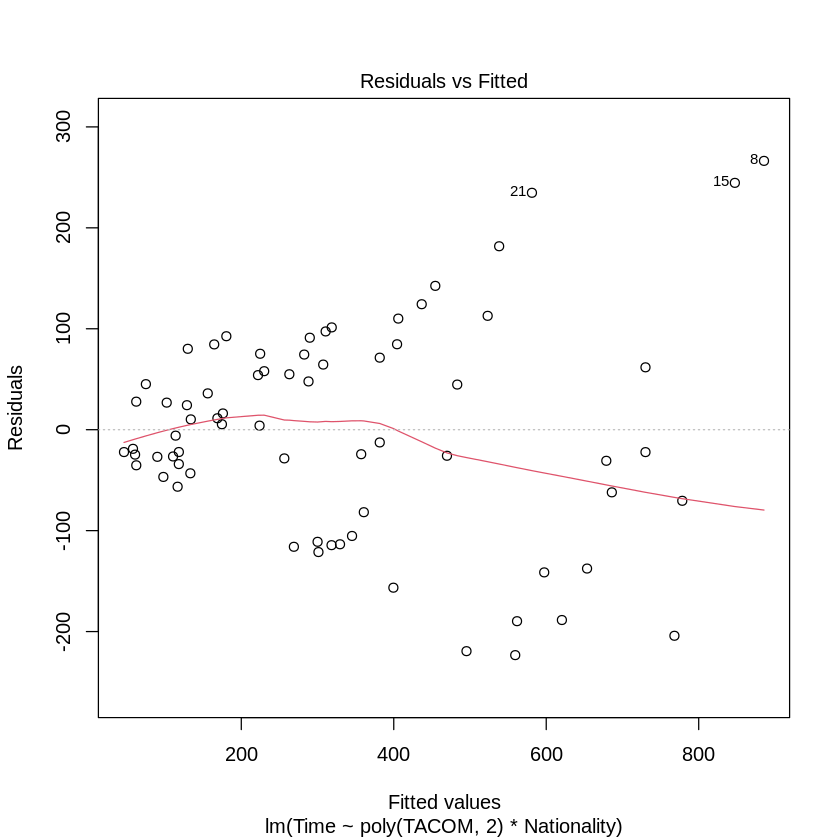

In [ ]:
plot(mod2, 1)

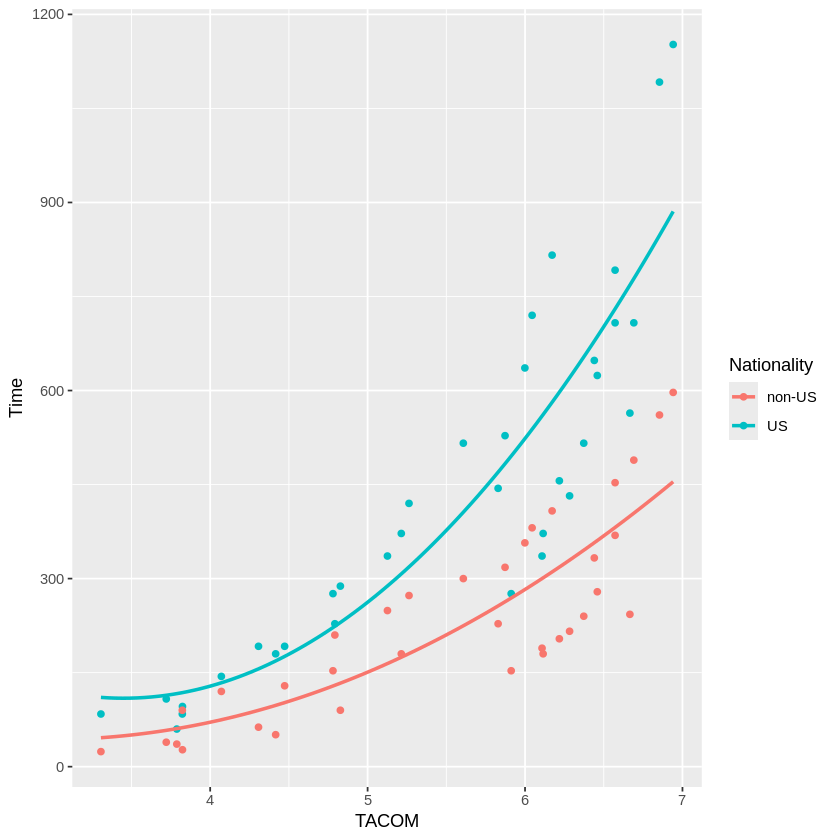

In [ ]:
ggplot(data = npp) + geom_point(aes(x = TACOM, y = Time, col=Nationality)) +
  geom_smooth(aes(x = TACOM, y = Time, col=Nationality), method='lm', formula = y~poly(x,2), se = FALSE)

***The polynomials appear to much better model the mean completion time.  However there are still some issues with constant variance violations as demonstrated by the fan shape in the residual plot, and in the non-flat smooth of the scale-location plot shown below:***

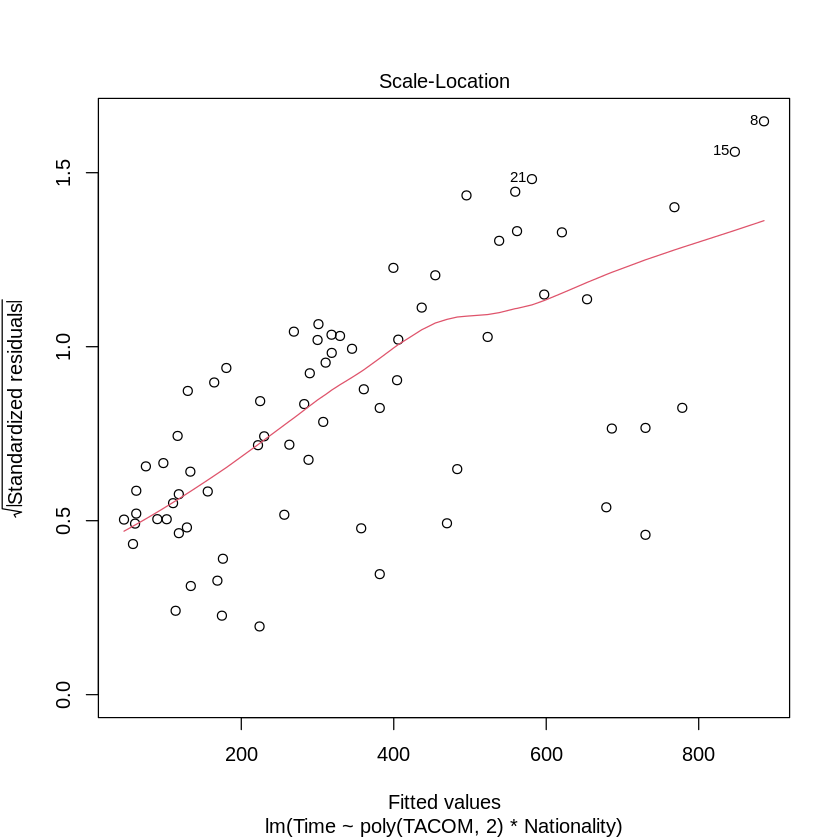

In [ ]:
plot(mod2, which = 3)

## D)

Use AICs, BICs, and a nested ANOVA to formally compare the two models.  Comment on what your results imply about which model is preferable.

In [ ]:
AIC(mod1, mod2)

,df,AIC
,<dbl>,<dbl>
mod1,5,871.2556
mod2,7,863.5978


In [ ]:
BIC(mod1, mod2)

,df,BIC
,<dbl>,<dbl>
mod1,5,882.4980
mod2,7,879.3373


In [ ]:
anova(mod2,mod1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64,765075.6,NA,NA,NA,NA
2,66,903714.8,-2,-138639.1,5.79871,0.004847701


***The AIC and BIC are both smaller for Model 2 than than Model 1, and the ANOVA p-value < 0.05 all suggest convincing evidence that Model 2's fit is a significant improvement upon Model 1.***

## E)

Your boss is primarily interested in the impact of task complexity on completion time.  Using your "best" model as determined in the previous question, contrast the modeled completion time for tasks with TACOM scores of 4 to tasks with scores of 6.  Perform this contrast separately for  U.S. and non-U.S. NPPWs.  Fully detail your findings, including interpreting estimates of the contrasts; p-values; and 95% CI.  Use whichever standard error estimator you deem most appropriate in your contrasts.  For which nationality is the impact of complexity on completion time most striking?

In [ ]:
(emobj <- emmeans(mod2, specs = ~TACOM, by='Nationality', at = list(TACOM=c(4, 6)), vcov.=vcovHC))

Nationality = non-US:
 TACOM emmean   SE df lower.CL upper.CL
     4   70.9 11.6 64     47.7     94.2
     6  282.7 18.9 64    245.0    320.4

Nationality = US:
 TACOM emmean   SE df lower.CL upper.CL
     4  128.5 12.3 64    103.8    153.1
     6  523.5 29.4 64    464.7    582.3

Confidence level used: 0.95 

In [ ]:
contrast(emobj,'pairwise')

Nationality = non-US:
 contrast        estimate   SE df t.ratio p.value
 TACOM4 - TACOM6     -212 21.0 64 -10.078  <.0001

Nationality = US:
 contrast        estimate   SE df t.ratio p.value
 TACOM4 - TACOM6     -395 31.9 64 -12.370  <.0001


In [ ]:
confint(contrast(emobj,'pairwise'))

,contrast,Nationality,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TACOM4 - TACOM6,non-US,-211.7910,21.01574,64,-253.7748,-169.8072
2,TACOM4 - TACOM6,US,-395.0245,31.93381,64,-458.8197,-331.2294


***For non-US workers, tasks with a complexity score of 4 points took 211 seconds less to complete, on average, than tasks with a complexity of 6 points; a statistically significant difference (p-value < .0001; 95% CI: 1870, 254).***

***For US workers, tasks with a complexity of 4 points took 395 seconds less to complete, on average, than tasks with a complexity of 6 points; a statistically significant difference (p-value < .0001; 95% CI: 331, 459).***

***The increase in completion time for a corresponding increase in task complexity is much more striking for the U.S. workers than for the non-U.S. workers.***